# Пакет Kryloff for Sage
## Ver. 2.1
Сделан на основе версии 1.23. 

In [1]:
load('kryloff.sage')

## Описание

Вот так можно записать сумму в Sage, не вычисляя ее

In [2]:
var('x,n')
sum(sin(n*x)/n,n,1,oo, hold=True)

sum(sin(n*x)/n, n, 1, +Infinity)

Такую сумму можно преобразовать в элемент класса 'TrigonometricSeries'

In [3]:
TrigonometricSeries(sum(sin(n*x)/n+cos(n*x)/n^2,n,1,oo, hold=True))

Вот так его можно вывести на печать:

In [4]:
TrigonometricSeries(sum(sin(n*x)/n+cos(n*x)/n^2,n,1,oo, hold=True)).latex()

{\sum_{n=1}^{+\infty} \frac{\sin\left(n x\right)}{n} + \frac{\cos\left(n x\right)}{n^{2}}}

Метод 'list' возвращает список $[a_n,b_n,x]$:

In [5]:
TrigonometricSeries(sum(sin(n*x)/n+cos(n*x)/n^2,n,1,oo, hold=True)).list()

[n^(-2), 1/n, x]

Ошибки отлавливаются на этапе примнения этого метода

In [6]:
TrigonometricSeries(sum(sin(n*x)/n/x+cos(n*x)/n^2,n,1,oo, hold=True)).list()

'Error: the expression is not a trigonometric series'

Ряды только по sin или только по cos опознаются даже при изуродованном задании

In [7]:
TrigonometricSeries(sum(sin(n*x)/n+sin(n*x)/n^3,n,1,oo, hold=True)).list()

[0, (n^2 + 1)/n^3, x]

Проблема

In [8]:
TrigonometricSeries(sum(sin(n*x)/n+sin(n*x)/n^3+cos(n*x)/n,n,1,oo, hold=True)).list()

'Error: the expression is not a trigonometric series'

In [9]:
TrigonometricSeries(sum((1/n+1/n^3)*sin(n*x)+cos(n*x)/n,n,1,oo, hold=True)).list()

[1/n, 1/n + 1/n^3, x]

Метод 'kryloff_slow_part(r)' возвращает медленную часть ряда по методу Крылова, $r$ --- порядок. Метод возвращает символьное выражение, которое опять можно преобразовать в тригонометрический ряд. 

In [10]:
ser=TrigonometricSeries(sum(sin(n*x)/(n+2*n^3)+cos(n*x)/n^2,n,1,oo, hold=True)).kryloff_slow_part(9)
ser

sum(1/16*(8/n^3 - 4/n^5 + 2/n^7 - 1/n^9)*sin(n*x) + cos(n*x)/n^2, n, 1, +Infinity)

Метод 'eval' позволяет вычислять некоторые суммы на отрезке $0<x<2\pi$ в конечном виде, 

In [11]:
TrigonometricSeries(sum(sin(n*x)/n+sin(n*x)/n^2-2*sin(n*x)/n^3,n,1,oo, hold=True)).eval()

-1/6*pi^3*(2*x/pi - 3*x^2/pi^2 + x^3/pi^3) - 1/2*pi*(x/pi - 1) + kryloff_sin(x, 2)

## Пример 1
$$
\sum \limits_{n=1}^\infty \frac{\sin nx}{n}
$$

In [18]:
var('x,n')
f=sum(sin(n*x)/n,n,1,oo, hold=True)
TrigonometricSeries(f).eval()

-1/2*pi*(x/pi - 1)

In [19]:
TrigonometricSeries(f).eval(method='bernoulli')

-1/2*pi*(x/pi - 1)

In [20]:
TrigonometricSeries(f).eval(method='sage')

1/2*arctan2(sin(x), cos(x) - 1) + 1/2*arctan2(sin(x), -cos(x) + 1) - 1/2*arctan2(sin(x), cos(x))

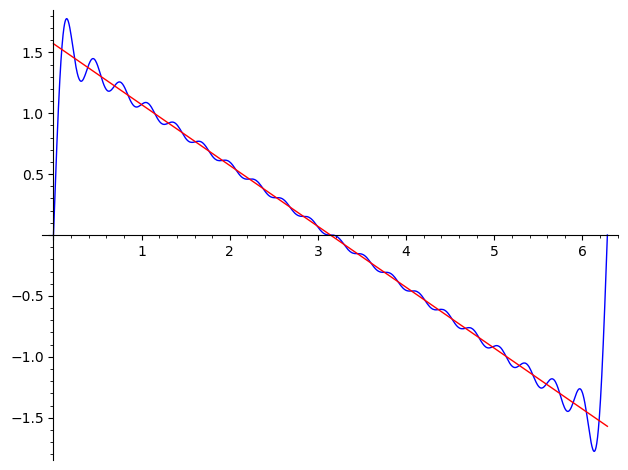

In [25]:
plot(approx(f,20),(x,0,2*pi))+\
plot(TrigonometricSeries(f).eval(),(x,0,2*pi), color='red')

## Пример 2
$$
{\sum_{n=1}^{+\infty} {\left(\frac{3}{3 \, n^{4} + n^{2}} + \frac{2}{n}\right)} \cos\left(n x\right) + \frac{\sin\left(n x\right)}{2 \, n^{3} + n}}
\simeq {\sum_{n=1}^{+\infty} \frac{1}{243} \, {\left(\frac{486}{n} + \frac{243}{n^{4}} - \frac{81}{n^{6}} + \frac{27}{n^{8}} - \frac{9}{n^{10}} + \frac{3}{n^{12}} - \frac{1}{n^{14}}\right)} \cos\left(n x\right) + \frac{1}{128} \, {\left(\frac{64}{n^{3}} - \frac{32}{n^{5}} + \frac{16}{n^{7}} - \frac{8}{n^{9}} + \frac{4}{n^{11}} - \frac{2}{n^{13}} + \frac{1}{n^{15}}\right)} \sin\left(n x\right)}
$$

In [31]:
f=sum(sin(n*x)/(n+2*n^3)+(2/n+3/(n^2+3*n^4))*cos(n*x),n,1,oo, hold=True)
ff=TrigonometricSeries(f)
ser_slow=ff.kryloff_slow_part(15)
ser_slow

sum(1/243*(486/n + 243/n^4 - 81/n^6 + 27/n^8 - 9/n^10 + 3/n^12 - 1/n^14)*cos(n*x) + 1/128*(64/n^3 - 32/n^5 + 16/n^7 - 8/n^9 + 4/n^11 - 2/n^13 + 1/n^15)*sin(n*x), n, 1, +Infinity)

In [32]:
ser_slow_eval=TrigonometricSeries(ser_slow).eval()
ser_slow_eval

1/1004293914624000*pi^15*(860160*x/pi - 1415168*x^3/pi^3 + 698880*x^5/pi^5 - 164736*x^7/pi^7 + 22880*x^9/pi^9 - 2184*x^11/pi^11 + 210*x^13/pi^13 - 45*x^14/pi^14 + 3*x^15/pi^15) + 1/635529742848000*pi^14*(1415168*x^2/pi^2 - 1164800*x^4/pi^4 + 384384*x^6/pi^6 - 68640*x^8/pi^8 + 8008*x^10/pi^10 - 910*x^12/pi^12 + 210*x^13/pi^13 - 15*x^14/pi^14 - 286720) - 1/83691159552000*pi^13*(1415168*x/pi - 2329600*x^3/pi^3 + 1153152*x^5/pi^5 - 274560*x^7/pi^7 + 40040*x^9/pi^9 - 5460*x^11/pi^11 + 1365*x^12/pi^12 - 105*x^13/pi^13) - 1/105921623808000*pi^12*(6988800*x^2/pi^2 - 5765760*x^4/pi^4 + 1921920*x^6/pi^6 - 360360*x^8/pi^8 + 60060*x^10/pi^10 - 16380*x^11/pi^11 + 1365*x^12/pi^12 - 1415168) + 1/7664025600*pi^11*(2560*x/pi - 4224*x^3/pi^3 + 2112*x^5/pi^5 - 528*x^7/pi^7 + 110*x^9/pi^9 - 33*x^10/pi^10 + 3*x^11/pi^11) + 1/6466521600*pi^10*(12672*x^2/pi^2 - 10560*x^4/pi^4 + 3696*x^6/pi^6 - 990*x^8/pi^8 + 330*x^9/pi^9 - 33*x^10/pi^10 - 2560) - 1/58060800*pi^9*(384*x/pi - 640*x^3/pi^3 + 336*x^5/pi^5 - 120*

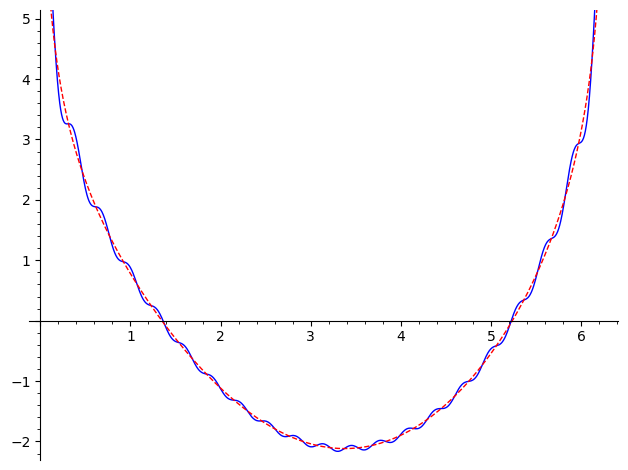

In [33]:
plot(approx(f,20),(x,0,2*pi))+\
plot(ser_slow_eval,(x,0,2*pi), color='red', linestyle='--', ymax=5)

## Дифференцирование

### Пример 1

In [34]:
var('x,n')
f=sum(sin(n*x)*n^2/(n+2*n^3),n,1,oo, hold=True)
ser=TrigonometricSeries(f)

In [35]:
ser.kryloff_slow_part(5)

sum(1/8*(4/n - 2/n^3 + 1/n^5)*sin(n*x), n, 1, +Infinity)

In [36]:
ser.diff(x)

sum(-1/2*cos(n*x)/(2*n^2 + 1), n, 1, +Infinity) - 1/4

График суммы и ее производной

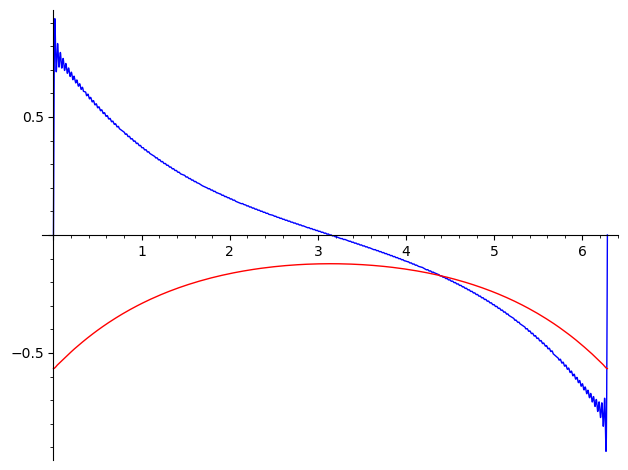

In [41]:
plot(approx(f,200),(x,0,2*pi))+\
plot(approx(ser.diff(x),100),(x,0,2*pi), color='red')

### Пример 2

In [42]:
var('x,n')
f=sum(cos(n*x)/n,n,1,oo, hold=True)
ser=TrigonometricSeries(f)

In [43]:
ser.kryloff_slow_part(1)

sum(cos(n*x)/n, n, 1, +Infinity)

In [44]:
ser.diff(x)

-1/4*(cos(1/2*conjugate(x))*sin(1/2*x) + cos(1/2*x)*sin(1/2*conjugate(x)))/abs(sin(1/2*x))^2

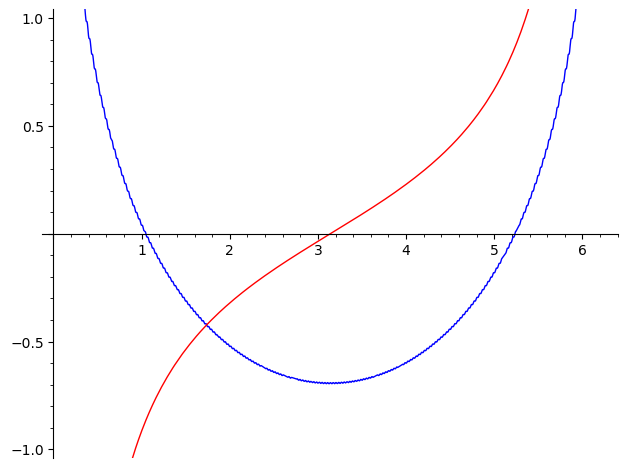

In [45]:
plot(approx(f,200),(x,0,2*pi))+\
plot(approx(ser.diff(x),100),(x,0,2*pi), color='red', ymin=-1, ymax=1)

Так делать нельзя:

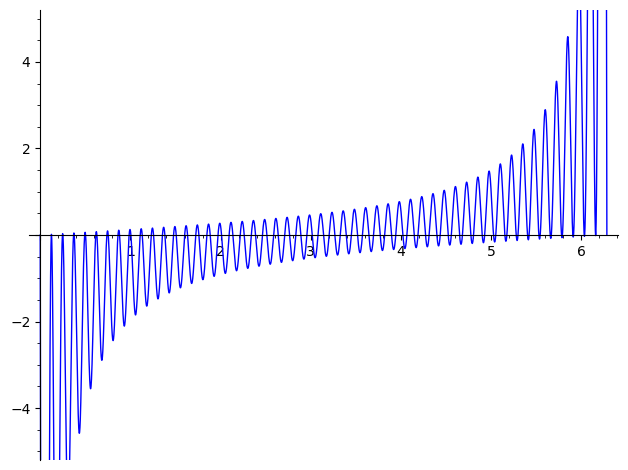

In [50]:
plot(approx(f,50).diff(x),(x,0,2*pi), ymin=-5, ymax=5)